In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
file_path = 'drinks.csv'
drinks = pd.read_csv(file_path)

In [92]:
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [93]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [94]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [95]:
# (1) beer_servings, wine_servings 두 변수간 피어슨 상관계수를 계산
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [96]:
cols=['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method='pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


In [97]:
corr.values

array([[1.        , 0.45881887, 0.52717169, 0.83583863],
       [0.45881887, 1.        , 0.19479705, 0.65496818],
       [0.52717169, 0.19479705, 1.        , 0.66759834],
       [0.83583863, 0.65496818, 0.66759834, 1.        ]])

In [98]:
# (2) corr 행렬 히트맵을 통한 시각화하기
import seaborn as sns

In [99]:
cols_view = ['beer', 'spirit', 'wine', 'alcohol']
sns.set(font_scale=1.5)

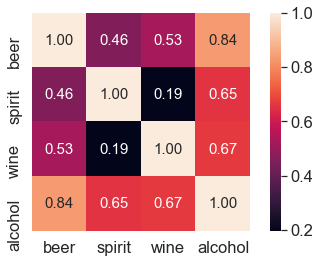

In [100]:
hm = sns.heatmap(corr.values, cbar=True, annot=True, fmt='.2f', square=True, annot_kws={'size' : 15}, yticklabels=cols_view, xticklabels=cols_view)

plt.tight_layout()
plt.show()

In [101]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [102]:
plt.show()

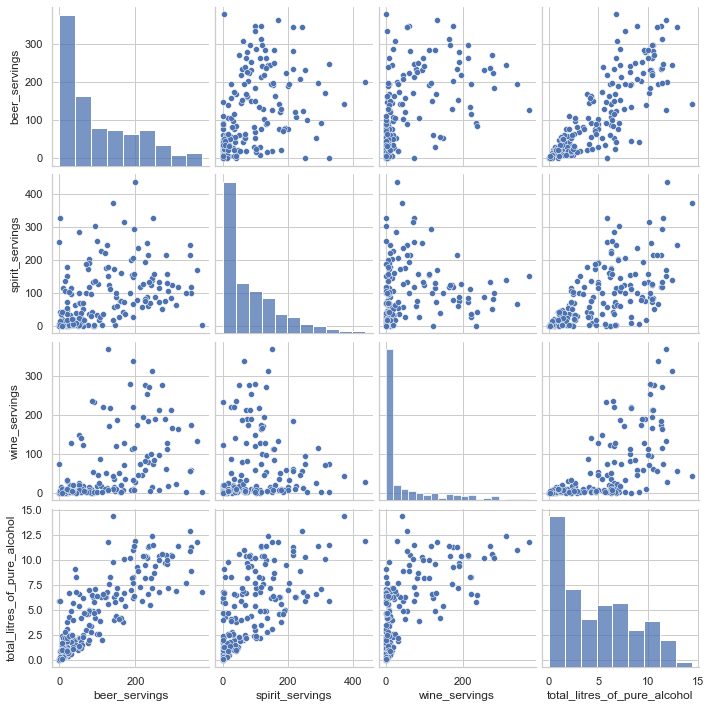

In [103]:
# (3) scatter plot 출력하기
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

In [104]:
print(drinks.isnull().sum())
print("-----------------------------------------")
print(drinks.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
-----------------------------------------
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [105]:
print(drinks.isnull().sum())
print("------------------------------------")
print(drinks.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
------------------------------------
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [106]:
drinks['continent'] = drinks['continent'].fillna('OT') # OT = other

In [107]:
print(drinks.isnull().sum())

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64


In [108]:
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


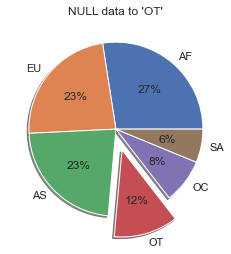

In [109]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)
plt.pie(fracs1, explode = explode, labels = labels, autopct = '%.0f%%', shadow = True)
plt.title("NULL data to 'OT'")
plt.show()

In [110]:
labels = drinks['continent'].value_counts().index.tolist()
print(labels)

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']


In [111]:
fracs1 = drinks['continent'].value_counts().values.tolist()
print(fracs1)

[53, 45, 44, 23, 16, 12]


<ipython-input-112-913ffc72dc63>:3: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  plt.pie(fracs1,


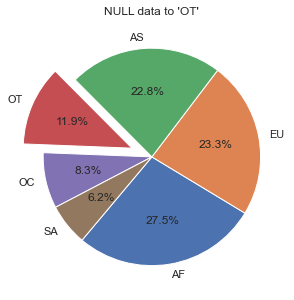

In [112]:
plt.figure(figsize = (5, 5))
explode = (0, 0, 0, 0.2, 0, 0)
plt.pie(fracs1,
        explode = explode,
        labels = labels,
        colors = None,
        autopct = '%.1f%%',
        pctdistance = 0.6,
        shadow = False,
        labeldistance = 1.1,
        startangle = 230,
        radius = None,
        counterclock = True,
        wedgeprops = None,
        textprops = None,
        center = (0, 0),
        frame = False,
        rotatelabels = False)
plt.title("NULL data to 'OT'")
plt.show()
plt.rc('font', size = 10)

In [113]:
# (4) 대륙별로 spirit_servings의 평균, 최소, 최대, 총합을 계산하기
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result.head(10)

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [114]:
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'count'])
result.head(10)

,mean,min,max,count
continent,,,,
AF,16.339623,0,152,53
AS,60.840909,0,326,44
EU,132.555556,0,373,45
OC,58.437500,0,254,16
OT,165.739130,68,438,23
SA,114.750000,25,302,12


In [115]:
result = drinks.groupby('continent').beer_servings.agg(['mean', 'min', 'max', 'count'])
result.head(10)

,mean,min,max,count
continent,,,,
AF,61.471698,0,376,53
AS,37.045455,0,247,44
EU,193.777778,0,361,45
OC,89.687500,0,306,16
OT,145.434783,1,285,23
SA,175.083333,93,333,12


In [116]:
result = drinks.groupby('continent').wine_servings.agg(['mean', 'min', 'max', 'count'])
result.head(10)

,mean,min,max,count
continent,,,,
AF,16.264151,0,233,53
AS,9.068182,0,123,44
EU,142.222222,0,370,45
OC,35.625000,0,212,16
OT,24.521739,1,100,23
SA,62.416667,1,221,12


In [117]:
result = drinks.groupby('continent').total_litres_of_pure_alcohol.agg(['mean', 'min', 'max', 'count'])
result.head(10)

,mean,min,max,count
continent,,,,
AF,3.007547,0.0,9.1,53
AS,2.170455,0.0,11.5,44
EU,8.617778,0.0,14.4,45
OC,3.381250,0.0,10.4,16
OT,5.995652,2.2,11.9,23
SA,6.308333,3.8,8.3,12


In [118]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
total_mean

4.717098445595855

In [119]:
continent_mean= drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
print(continent_mean)

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [120]:
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [121]:
beer_continent = drinks.groupby('continent').beer_servings.mean()
beer_continent

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
OT    145.434783
SA    175.083333
Name: beer_servings, dtype: float64

In [122]:
beer_continent_max = beer_continent[beer_continent == beer_continent.max()]
beer_continent_max

continent
EU    193.777778
Name: beer_servings, dtype: float64

In [123]:
beer_continent.idxmax()

'EU'

In [124]:
beer_continent[beer_continent.idxmax()]

193.77777777777777

In [125]:
beer_continent_min = beer_continent[beer_continent == beer_continent.min()]
beer_continent_min

continent
AS    37.045455
Name: beer_servings, dtype: float64

In [126]:
beer_continent.idxmin()

'AS'

In [127]:
beer_continent[beer_continent.idxmin()]

37.04545454545455

In [128]:
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'count'])
result.head(10)

,mean,min,max,count
continent,,,,
AF,16.339623,0,152,53
AS,60.840909,0,326,44
EU,132.555556,0,373,45
OC,58.437500,0,254,16
OT,165.739130,68,438,23
SA,114.750000,25,302,12


In [129]:
number_groups = len(result.index)
number_groups

6

In [130]:
means = result['mean'].tolist()
means

[16.339622641509433,
 60.84090909090909,
 132.55555555555554,
 58.4375,
 165.7391304347826,
 114.75]

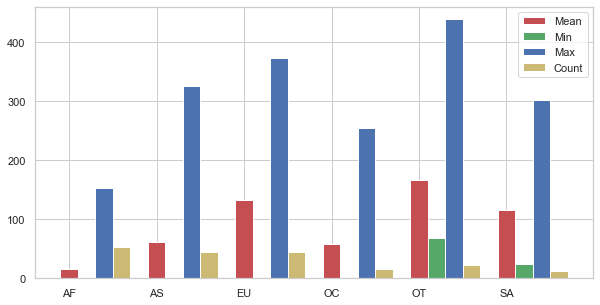

In [131]:
mins = result['min'].tolist()
maxs = result['max'].tolist()
counts = result['count'].tolist()
index = np.arange(number_groups)

plt.figure(figsize = (10,5))
bar_width = 0.2

rects_1 = plt.bar(index, means, bar_width, color = 'r', label = 'Mean')
rects_2 = plt.bar(index+bar_width, mins, bar_width, color = 'g', label = 'Min')
rects_3 = plt.bar(index+bar_width * 2, maxs, bar_width, color='b', label = 'Max')
rects_4 = plt.bar(index+bar_width * 3, counts, bar_width, color = 'y', label = 'Count')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

In [132]:
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [133]:
continents = continent_mean.index.tolist()
continents

['AF', 'AS', 'EU', 'OC', 'OT', 'SA']

In [134]:
continents.append('MEAN')
continents

['AF', 'AS', 'EU', 'OC', 'OT', 'SA', 'MEAN']

In [135]:
x_pos = np.arange(len(continents))
x_pos

array([0, 1, 2, 3, 4, 5, 6])

In [136]:
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
alcohol

[3.00754716981132,
 2.1704545454545454,
 8.617777777777777,
 3.3812500000000005,
 5.995652173913044,
 6.308333333333334,
 4.717098445595855]

In [137]:
total_mean

4.717098445595855

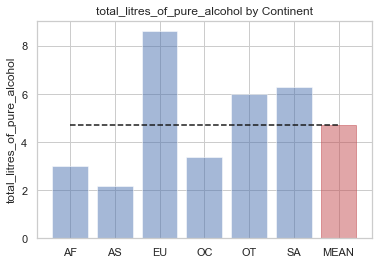

In [139]:
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents)-1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

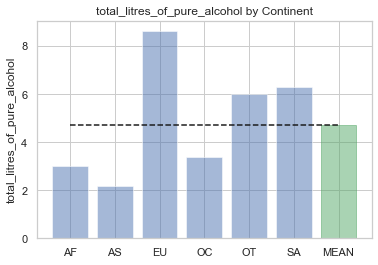

In [140]:
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents)-1].set_color('g')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

In [141]:
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

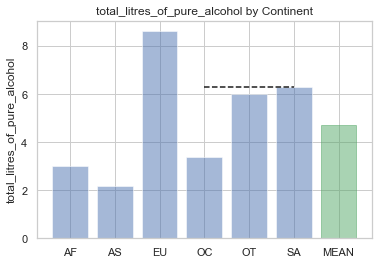

In [142]:
bar_list = plt.bar(x_pos, alcohol, align = 'center', alpha = 0.5)
bar_list[len(continents) - 1].set_color('g')
plt.plot([3., 5], [continent_mean['SA'], continent_mean['SA']], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

In [143]:
!pip install scipy

In [144]:
africa = drinks.loc[drinks['continent'] == 'AF']
africa.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,AF
4,Angola,217,57,45,5.9,AF
18,Benin,34,4,13,1.1,AF
22,Botswana,173,35,35,5.4,AF
26,Burkina Faso,25,7,7,4.3,AF


In [146]:
europe = drinks.loc[drinks['continent'] == 'EU']
europe.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU


In [147]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [148]:
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

In [150]:
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']

drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

In [151]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495


In [152]:
country_rank = drinks[['country', 'alcohol_rate']]
country_rank = country_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_rank.head()

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


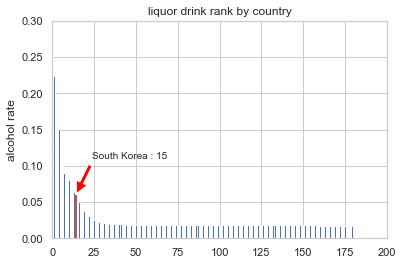

In [155]:
country_list = country_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_rank[country_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1),
            xy = (korea_rank, korea_alc_rate),
            xytext = (korea_rank + 10, korea_alc_rate + 0.05),
            arrowprops = dict(facecolor = 'red', shrink = 0.05))
plt.show()

In [156]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
total_mean

4.717098445595855

In [157]:
continent_sum = drinks.groupby('continent').spirit_servings.agg(['sum'])
continent_sum

,sum
continent,
AF,866
AS,2677
EU,5965
OC,935
OT,3812
SA,1377


In [158]:
continent_sum['mean'] = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_sum

,sum,mean
continent,,
AF,866,3.007547
AS,2677,2.170455
EU,5965,8.617778
OC,935,3.381250
OT,3812,5.995652
SA,1377,6.308333


In [159]:
continent_sum[continent_mean < total_mean]

,sum,mean
continent,,
AF,866,3.007547
AS,2677,2.170455
OC,935,3.381250


In [160]:
continent_sum[continent_mean < total_mean].loc[:, 'sum'].idxmax()

'AS'

In [161]:
a = drinks['continent'].str.contains('AS|AF|OC')
print(a)

0       True
1      False
2       True
3      False
4       True
       ...  
188    False
189     True
190     True
191     True
192     True
Name: continent, Length: 193, dtype: bool


In [162]:
b = drinks[a]
print(b)

         country  beer_servings  spirit_servings  wine_servings  \
0    Afghanistan              0                0              0   
2        Algeria             25                0             14   
4         Angola            217               57             45   
8      Australia            261               72            212   
12       Bahrain             42               63              7   
..           ...            ...              ...            ...   
187      Vanuatu             21               18             11   
189      Vietnam            111                2              1   
190        Yemen              6                0              0   
191       Zambia             32               19              4   
192     Zimbabwe             64               18              4   

     total_litres_of_pure_alcohol continent  total_servings  alcohol_rate  
0                             0.0        AS               0      0.000000  
2                             0.7        AF

In [163]:
spirit_continent_max = b[b['spirit_servings'] == b['spirit_servings'].max()]
spirit_continent_max

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
141,Russian Federation,247,326,73,11.5,AS,646,0.017802


In [164]:
a = drinks[drinks['continent'].isin(['AS', 'AF', 'OC'])]
a

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
2,Algeria,25,0,14,0.7,AF,39,0.017949
4,Angola,217,57,45,5.9,AF,319,0.018495
8,Australia,261,72,212,10.4,OC,545,0.019083
12,Bahrain,42,63,7,2.0,AS,112,0.017857
...,...,...,...,...,...,...,...,...
187,Vanuatu,21,18,11,0.9,OC,50,0.018000
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


In [165]:
spirit_continent_max = a[a['spirit_servings'] == a['spirit_servings'].max()]
spirit_continent_max

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
141,Russian Federation,247,326,73,11.5,AS,646,0.017802


In [166]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,0.017661
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


In [167]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
total_mean

4.717098445595855

In [168]:
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [169]:
continent_under_mean = continent_mean[continent_mean <= total_mean].index.tolist()
continent_under_mean

['AF', 'AS', 'OC']

In [170]:
df_continent_under_mean = drinks.loc[drinks.continent.isin(continent_under_mean)]
df_continent_under_mean

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
2,Algeria,25,0,14,0.7,AF,39,0.017949
4,Angola,217,57,45,5.9,AF,319,0.018495
8,Australia,261,72,212,10.4,OC,545,0.019083
12,Bahrain,42,63,7,2.0,AS,112,0.017857
...,...,...,...,...,...,...,...,...
187,Vanuatu,21,18,11,0.9,OC,50,0.018000
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


In [171]:
most_spirit_under_mean = df_continent_under_mean.loc[df_continent_under_mean['spirit_servings'].idxmax()]
most_spirit_under_mean

country                         Russian Federation
beer_servings                                  247
spirit_servings                                326
wine_servings                                   73
total_litres_of_pure_alcohol                  11.5
continent                                       AS
total_servings                                 646
alcohol_rate                             0.0178019
Name: 141, dtype: object